In [1]:
import pandas as pd
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.figure_factory as ff
import plotly.graph_objs as go
import numpy as np

%matplotlib inline 
import matplotlib.pyplot as plt
import requests as rq
import zipfile as zf
import scipy.stats as sps
from scipy.stats import norm
import seaborn as sns
import struct
import scipy
import scipy.misc
import scipy.cluster
import time
import colorsys
import math
import csv
import os
import locale
import sklearn
import sklearn.decomposition
import random
import scipy.stats as stats
import matplotlib
import IPython
import re
import datetime as dt
import bokeh.plotting
from pandas import to_datetime as dt
import missingno as msno

## Load and Clean Data

In [2]:
df = pd.read_table('data.txt')
df = df.drop(columns='Unnamed: 0', axis=1)
df = df[df['country'].isnull() == False]

country_list = []
for i in range(df.shape[0]):
    if (df['country'].tolist()[i].isdigit() == False) and (df['country'].tolist()[i].isalpha() == True):
        country_list.append(df['country'].tolist()[i])

df = df[df.country.isin(country_list)]

df['height'] = pd.to_numeric(df['height'],errors='coerce')
df['width'] = pd.to_numeric(df['width'],errors='coerce')
df = df[df['height'].isnull() == False]
df = df[df['width'].isnull() == False]

material_string = df['material']
material_string = material_string.str.lower()
df['material'] = material_string

/Users/jasonshi/anaconda3/envs/art/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning:

Columns (3,9,10) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
famous_artists = ['Pablo Picasso', 'Andy Warhol', 'Gustav Klimt', 'Paul Cezanne', 'Edvard Munch', 'Vincent van Gogh', 'Mark Rothko']
df_famous_artists = df[df.artist.apply(lambda x: x in famous_artists)]
df_small_artists = df[df.artist.apply(lambda x: x not in famous_artists)]
df_picasso = df[df.artist.apply(lambda x: x == 'Pablo Picasso')]
df_warhol = df[df.artist.apply(lambda x: x == 'Andy Warhol')]

## Overview 

## Missing Data Graphs

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37638 entries, 0 to 41252
Data columns (total 22 columns):
artist                37638 non-null object
country               37638 non-null object
yearOfBirth           37234 non-null object
yearOfDeath           30628 non-null object
name                  37638 non-null object
year                  25825 non-null object
price                 37638 non-null float64
material              37638 non-null object
height                37638 non-null float64
width                 37638 non-null float64
link                  37638 non-null object
source                37638 non-null object
dominantColor         37638 non-null object
brightness            37638 non-null float64
ratioUniqueColors     37638 non-null float64
thresholdBlackPerc    37638 non-null float64
highbrightnessPerc    37638 non-null float64
lowbrightnessPerc     37638 non-null float64
CornerPer             37638 non-null float64
EdgePer               37638 non-null float64
F

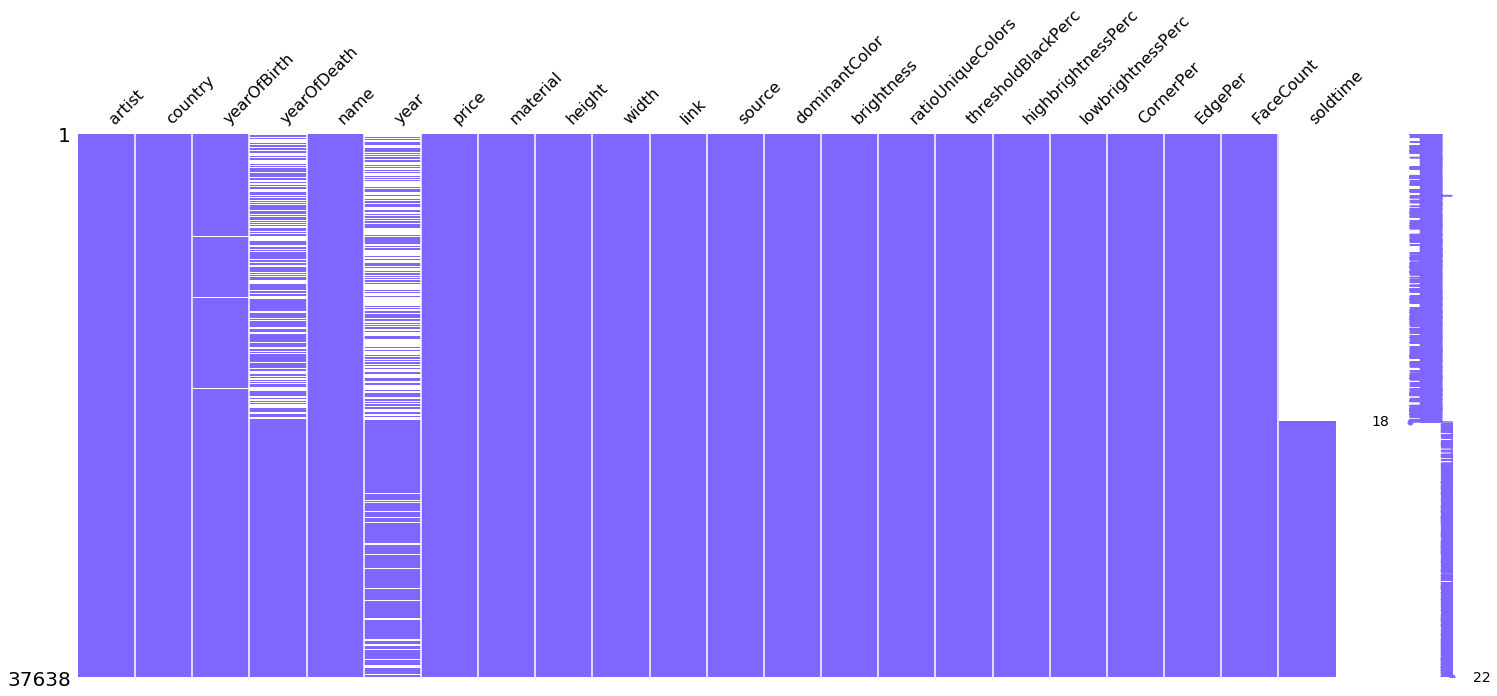

In [17]:
msno.matrix(df, color=(0.5, 0.4, 1.0))

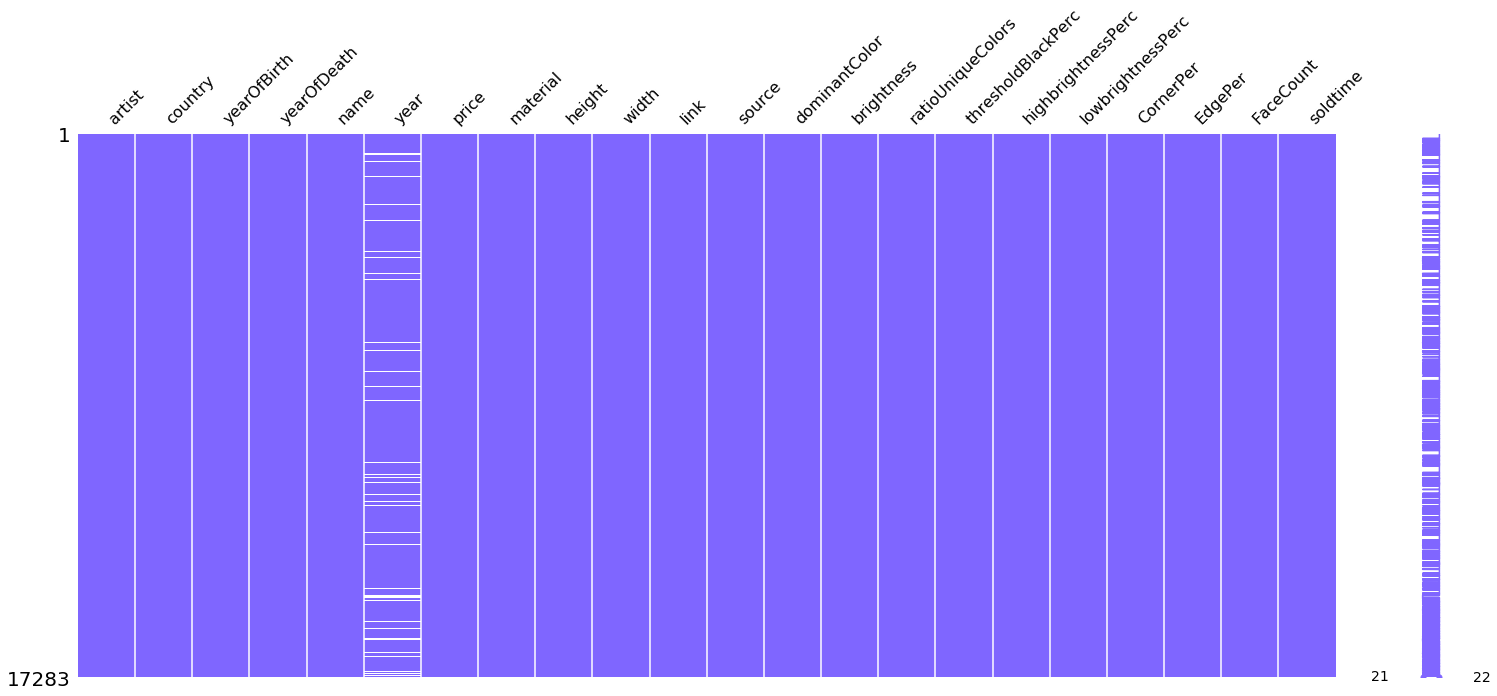

In [20]:
msno.matrix(df_famous_artists, color=(0.5, 0.4, 1.0))

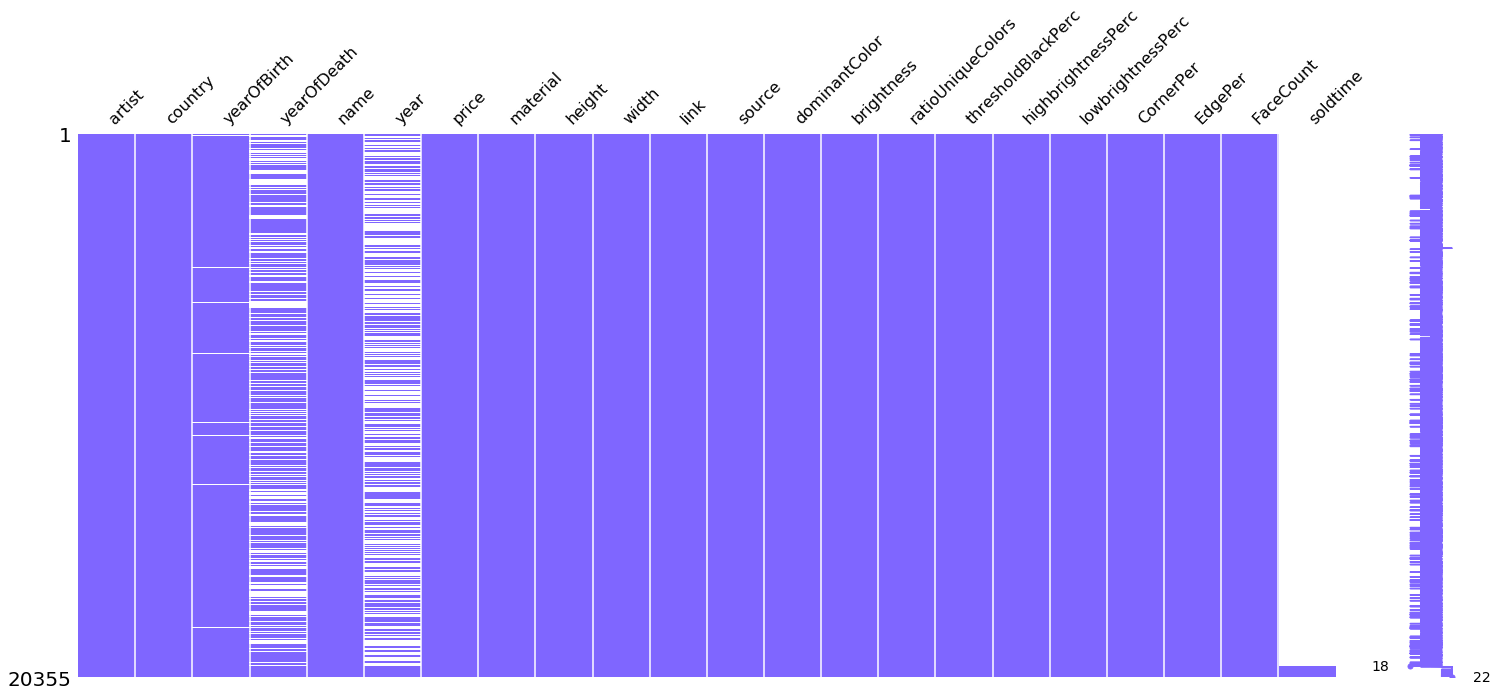

In [21]:
msno.matrix(df_small_artists, color=(0.5, 0.4, 1.0))

In [4]:
total_price = df['price'].sum().astype(int)
print ('This dataset consists of %s art pieces at a total valuation of $%s' %(df.shape[0] , total_price))

mean_price = int(df.price.mean())
max_price = int(df.price.max())
min_price = int(df.price.min())
median_price = int(df.price.median())
print ('Prices include a maximum of $%s, a mean of $%s and a minimum of $%s' %(max_price, mean_price, min_price))

This dataset consists of 37638 art pieces at a total valuation of $9470442161
Prices include a maximum of $119922500, a mean of $251619 and a minimum of $3


In [5]:
df = df.drop(['link', 'source'], 1)

In [6]:
print('Pablo Picasso (8913 entries) Andy Warhol (6930 entries) represent approximately 42% of the entire dataset.')

Pablo Picasso (8913 entries) Andy Warhol (6930 entries) represent approximately 42% of the entire dataset.


In [7]:
print ('The most popular name in the dataset is "Untitled" (625 entries).')

The most popular name in the dataset is "Untitled" (625 entries).


In [8]:
df.year.isnull().sum()

11813

In [9]:
print ('A lot of missing data in "Year of Death"(7010), "Year Made"(11813), and "Sold Time"(19960).')

A lot of missing data in "Year of Death"(7010), "Year Made"(11813), and "Sold Time"(19960).


In [10]:
print ('Most used material is oil on canvas (8662 entries).')

Most used material is oil on canvas (8662 entries).


In [11]:
print ("Most used material among less known artists is oil on canvas (8079 entries).")
print ("Most used material among famous artists is prints (3550 entries).")

Most used material among less known artists is oil on canvas (8079 entries).
Most used material among famous artists is prints (3550 entries).


In [12]:
df_picasso.material.value_counts()

prints                                                                             2853
works_on_paper_                                                                     592
oil_on_canvas                                                                       372
etching                                                                             323
lithograph                                                                          189
lithograph_on_arches_wove_paper                                                     118
etching_on_montval_laid_paper                                                       115
pencil_on_paper                                                                      93
etching_on_wove_paper                                                                90
color_lithograph                                                                     69
lithograph_on_arches                                                                 57
etching_on_rives_bfk            

https://www.artsy.net/article/the-art-genome-project-what-picasso-s-prints-reveal-about-the-world-s-most-famous-artist

In [13]:
df.dominantColor.value_counts()

whites      13825
grays        8920
blacks       6342
yellows      4833
reds         2438
cyans         609
blues         431
greens        126
magentas      114
Name: dominantColor, dtype: int64

In [14]:
print('The most dominant color used is white (13825 entries), may because images of art pieces consist of white borders.')

The most dominant color used is white (13825 entries), may because images of art pieces consist of white borders.


In [15]:
df.FaceCount.value_counts()

0.0     34189
1.0      3134
2.0       234
3.0        44
4.0        23
5.0         5
8.0         5
7.0         2
6.0         1
11.0        1
Name: FaceCount, dtype: int64

In [16]:
print('The most face count is zero (34189 entries), may because OpenCV does not recognize faces very well when faces mixed with background colors. Also impressionists like Picasso draw abstract faces, making it hard to be recognized.')

The most face count is zero (34189 entries), may because OpenCV does not recognize faces very well when faces mixed with background colors. Also impressionists like Picasso draw abstract faces, making it hard to be recognized.


In [17]:
print ('Pablo Picasso (8913 entries) Andy Warhol (6930 entries) represent approximately 42% of the entire dataset.')

Pablo Picasso (8913 entries) Andy Warhol (6930 entries) represent approximately 42% of the entire dataset.


In [18]:
print ('American artists(10165 entries) and Spanish artists(9808 entries).')

American artists(10165 entries) and Spanish artists(9808 entries).


In [57]:
df_famous_artists.artist.value_counts()

Pablo Picasso       8913
Andy Warhol         6930
Gustav Klimt         424
Paul Cezanne         382
Edvard Munch         369
Mark Rothko          133
Vincent van Gogh     132
Name: artist, dtype: int64

## Sold Time Range

In [22]:
df_date = pd.DataFrame(df.groupby('soldtime')['price'].sum())
df_date.index.min()

'1985-05-13 00:00:00'

In [23]:
df_date.index.max()

'2014-12-04 00:00:00'

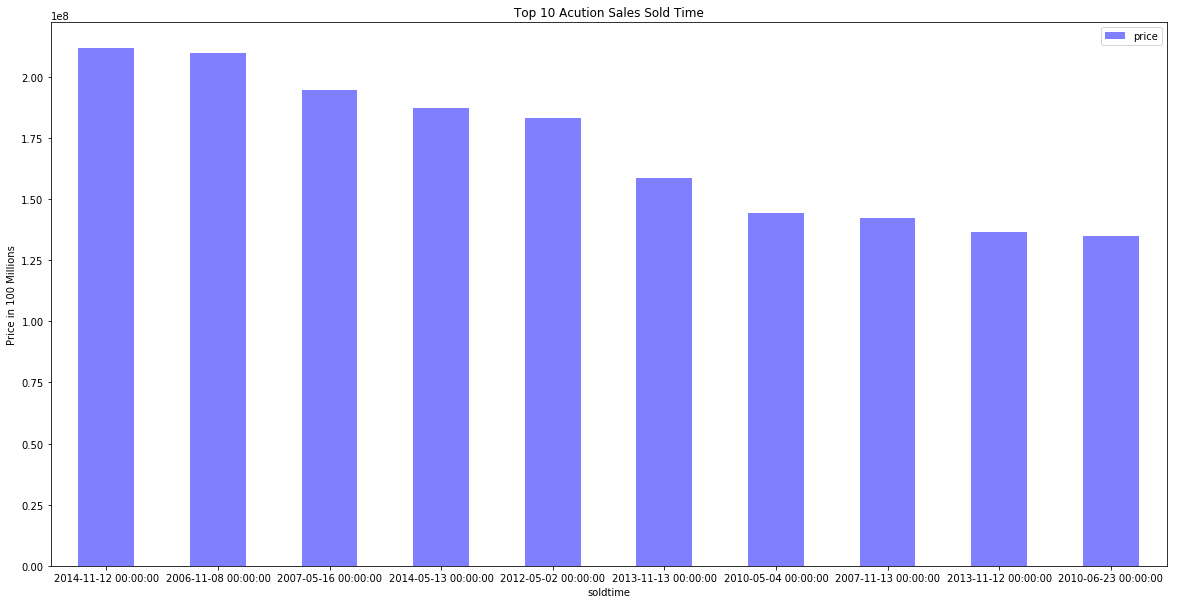

In [25]:
df_date1 = df_date.nlargest(n=10, columns='price')
df_date1.plot(kind='bar', figsize = (20,10), fontsize=10, title = "Top 10 Acution Sales Sold Time", color='blue', alpha=0.5, rot='horizontal')
plt.ylabel("Price in 100 Millions")
plt.show()

oldest time sold is 1985-05-13 and latest time sold is 2014-12-04. Highest total auction sales occured on 2014-11-12, approximately 212 million USD.

## Top 30 Auction Sales Group by Artists

In [26]:
df_top30_sale = df.sort_values(by='price', ascending=False)
df_top30_sale = df_top30_sale.iloc[:30]

In [27]:
df_sales_groupby_artist = pd.DataFrame(data=df_top30_sale.groupby('artist')['price'].sum(), columns=['price'])
df_sales_groupby_artist = df_sales_groupby_artist.sort_values(by='price', ascending=False)
df_sales_groupby_artist.reset_index(inplace=True)
df_sales_groupby_artist

,artist,price
0,Andy Warhol,599752500.0
1,Mark Rothko,445941000.0
2,Pablo Picasso,381285315.0
3,Vincent van Gogh,250765000.0
4,Gustav Klimt,121331708.0
5,Edvard Munch,119922500.0
6,Francis Bacon,44965000.0
7,Paul Cezanne,41605000.0


In [28]:
df_top30_sale.artist.value_counts()

Andy Warhol         9
Mark Rothko         7
Pablo Picasso       5
Vincent van Gogh    4
Gustav Klimt        2
Paul Cezanne        1
Francis Bacon       1
Edvard Munch        1
Name: artist, dtype: int64

In [29]:
data = [Bar(x=df_sales_groupby_artist.artist,
            y=df_sales_groupby_artist.price)]

py.iplot(data, filename='Top 30 Auction Sales Grouped by Artists')

In [30]:
data = [Bar(x=df_top30_sale.artist,
            y=df_top30_sale.price)]

py.iplot(data, filename='Top 8 Auction Sales')

In [31]:
warhol_total_sale = df_warhol.price.sum()
print ('Total sales for Andy Warhol is about 3 billion.')

Total sales for Andy Warhol is about 3 billion.


In [32]:
picasso_total_sale = df_picasso.price.sum()
print ('Total sales for Pablo Picasso is about 3.2 billion.')

Total sales for Pablo Picasso is about 3.2 billion.


## Mean Price Sold Per Country

In [33]:
df_country_mean_price = pd.DataFrame(data=df.groupby('country')['price'].mean(), columns=['price'])
df_country_mean_price = df_country_mean_price.sort_values(by='price', ascending=False)
df_country_mean_price.reset_index(inplace=True)
df_country_mean_price = df_country_mean_price[:15]

In [34]:
data = [Bar(x=df_country_mean_price.country,
            y=df_country_mean_price.price)]

py.iplot(data, filename='Mean Price Per Country (Top 15)')

Art pieces made by Dutch artists sold on average at $880,173 per piece.

## Top 10 Auction Sales Materials Used

In [35]:
df_top30_sale_material = df.sort_values(by='price', ascending=False)
df_top30_sale_material = df_top30_sale_material.iloc[:30]

data = [Bar(x=df_top30_sale_material.material,
            y=df_top30_sale_material.price)]

py.iplot(data, filename='Top 10 Auction Sales Materials Used')

## Price History for Famous Artists

In [36]:
#df0.plot(x=df0.index, figsize = (20,3), fontsize=10, title = "Price History for " + artists[0])

In [37]:
#ax=df0.plot(figsize = (20,3), fontsize=10, title = "Price History for " + artists[0])
#ax.set_xticklabels(df0.index[::]);

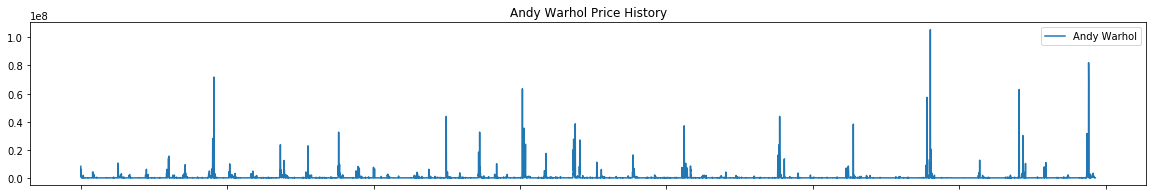

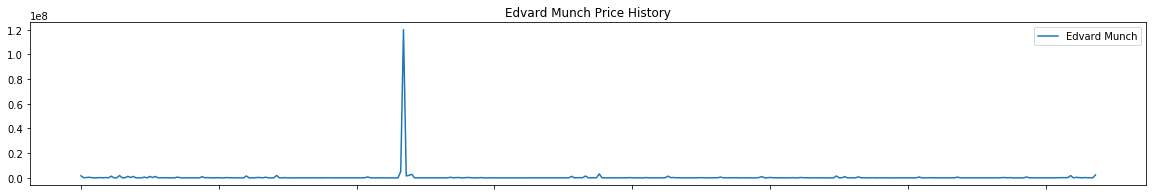

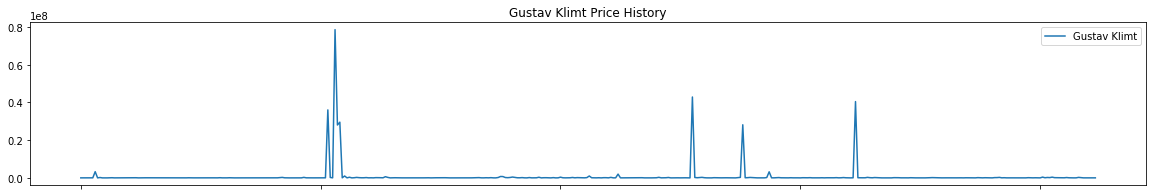

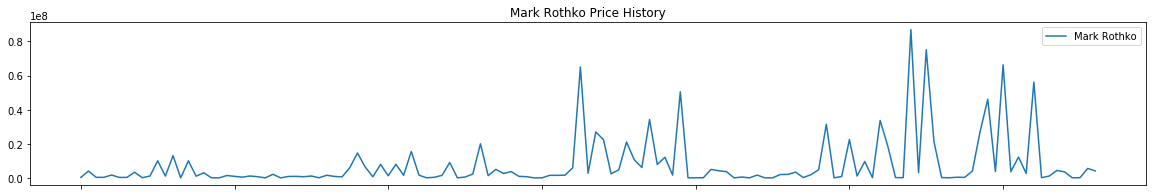

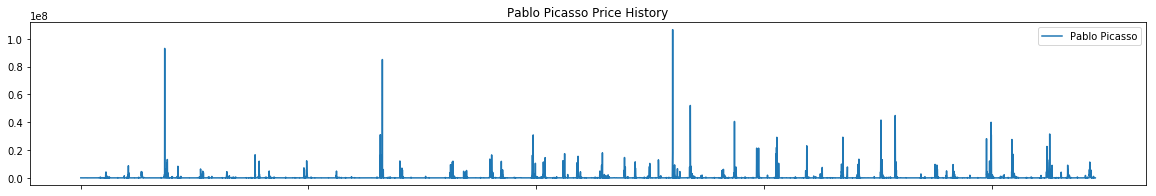

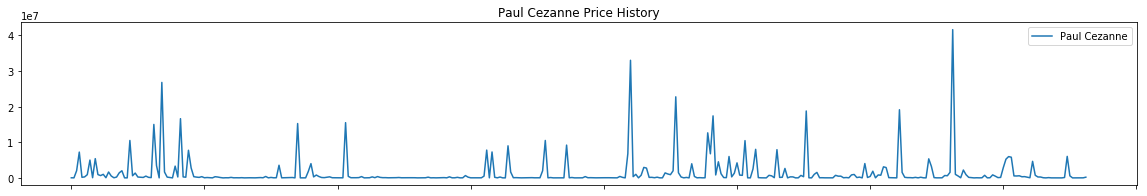

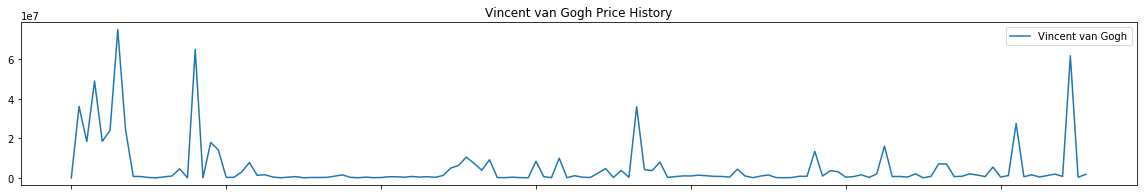

In [38]:
famous_artists_sold_time = [i[1]['soldtime'] for i in df_famous_artists.groupby(['artist'])]
famous_artists_sold_pricce = [i[1]['price'] for i in df_famous_artists.groupby(['artist'])]

artists = ['Andy Warhol','Edvard Munch', 'Gustav Klimt', 'Mark Rothko', 'Pablo Picasso', 'Paul Cezanne', 'Vincent van Gogh' ]

df0 = pd.DataFrame(famous_artists_sold_pricce[0].tolist(), index=famous_artists_sold_time[0].tolist(),columns = ['Andy Warhol'])
df0.sort_index(inplace=True)
df0.plot(figsize = (20,3), fontsize=10, title = artists[0] + " Price History")

df1 = pd.DataFrame(famous_artists_sold_pricce[1].tolist(), index=famous_artists_sold_time[1].tolist(),columns = ['Edvard Munch'])
df1.sort_index(inplace=True)
df1.plot(figsize = (20,3), fontsize=10, title = artists[1] + " Price History")

df2 = pd.DataFrame(famous_artists_sold_pricce[2].tolist(), index=famous_artists_sold_time[2].tolist(),columns = ['Gustav Klimt'])
df2.sort_index(inplace=True)
df2.plot(figsize = (20,3), fontsize=10, title = artists[2] + " Price History")

df3 = pd.DataFrame(famous_artists_sold_pricce[3].tolist(), index=famous_artists_sold_time[3].tolist(),columns = ['Mark Rothko'])
df3.sort_index(inplace=True)
df3.plot(figsize = (20,3), fontsize=10, title = artists[3] + " Price History")

df4 = pd.DataFrame(famous_artists_sold_pricce[4].tolist(), index=famous_artists_sold_time[4].tolist(),columns = ['Pablo Picasso'])
df4.sort_index(inplace=True)
df4.plot(figsize = (20,3), fontsize=10, title = artists[4] + " Price History")

df5 = pd.DataFrame(famous_artists_sold_pricce[5].tolist(), index=famous_artists_sold_time[5].tolist(),columns = ['Paul Cezanne'])
df5.sort_index(inplace=True)
df5.plot(figsize = (20,3), fontsize=10, title = artists[5] + " Price History")

df6 = pd.DataFrame(famous_artists_sold_pricce[6].tolist(), index=famous_artists_sold_time[6].tolist(),columns = ['Vincent van Gogh'])
df6.sort_index(inplace=True)
df6.plot(figsize = (20,3), fontsize=10, title = artists[6] + " Price History")

In [39]:
#data0 = [go.Scatter(x=df0.index, y=df0.['Andy Warhol'])]
#py.iplot(data0)
#'''latest 300 pieces sold'''

In [41]:
df0.sort_index(inplace=True)
data0 = [go.Scatter(x=df0.index, y=df0['Andy Warhol'], name='Andy Warhol Price History')]
py.iplot(data0)

https://www.nytimes.com/2013/11/14/arts/design/grisly-warhol-painting-fetches-104-5-million-auction-high-for-artist.html

https://www.artsy.net/article/sothebys-a-rare-warhol-disaster-painting-emerges

In [42]:
df1.sort_index(inplace=True)
data1 = [go.Scatter(x=df1.index, y=df1['Edvard Munch'], name='Edvard Munch Price History')]
py.iplot(data1)

https://www.nytimes.com/2012/05/03/arts/design/the-scream-sells-for-nearly-120-million-at-sothebys-auction.html

In [43]:
df2.sort_index(inplace=True)
data2 = [go.Scatter(x=df2.index, y=df2['Gustav Klimt'], name='Gustav Klimt Price History')]
py.iplot(data2)

In [44]:
df3.sort_index(inplace=True)
data3 = [go.Scatter(x=df3.index, y=df3['Mark Rothko'], name='Mark Rothko Price History')]
py.iplot(data3)

https://www.nytimes.com/2012/05/09/arts/design/rothko-painting-sells-for-record-nearly-87-million-at-christies.html

In [48]:
df4.sort_index(inplace=True)
data4 = [go.Scatter(x=df4.index, y=df4['Pablo Picasso'], name='Pablo Picasso Price History')]
py.iplot(data4)

https://www.nytimes.com/2010/05/05/arts/design/05auction.html

In [49]:
df5.sort_index(inplace=True)
data5 = [go.Scatter(x=df5.index, y=df5['Paul Cezanne'], name='Paul Cezanne Price History')]
py.iplot(data5)

In [51]:
df6.sort_index(inplace=True)
data6 = [go.Scatter(x=df6.index, y=df6['Vincent van Gogh'], name='Vincent van Gogh Price History')]
py.iplot(data6)

https://www.newsmax.com/thewire/van-gogh-61-million-auction-sothebys/2014/11/06/id/605639/

https://gbtimes.com/chinese-film-mogul-buys-van-goghs-floral-masterpiece-for-usd-618-million

## Total Price Sold Per Year Made

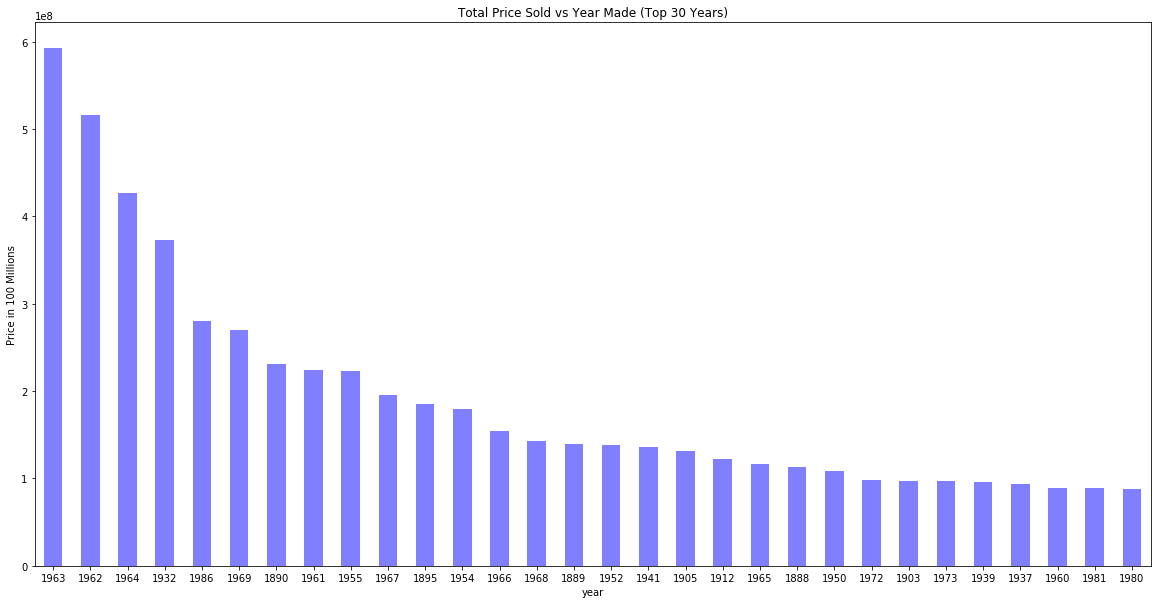

In [52]:
df_year = df.groupby(['year'])['price'].sum()
df_year = df_year.nlargest(n=30)

df_year.plot(kind='bar', figsize = (20,10), fontsize=10, title = "Total Price Sold vs Year Made (Top 30 Years)", rot='horizontal', color='blue', alpha=0.5)
plt.ylabel("Price in 100 Millions")
plt.show()

Paintings made in 1963 sold at a total of $592,217,105, approximately 6% of the total valuation of the dataset.

In [53]:
df_year = pd.DataFrame(df_year)
data = [Bar(x=df_year.index,
            y=df_year.price)]

py.iplot(data, filename='Price Per Year (Top 30 Years)')

## Mean Price Sold Per Dominant Color

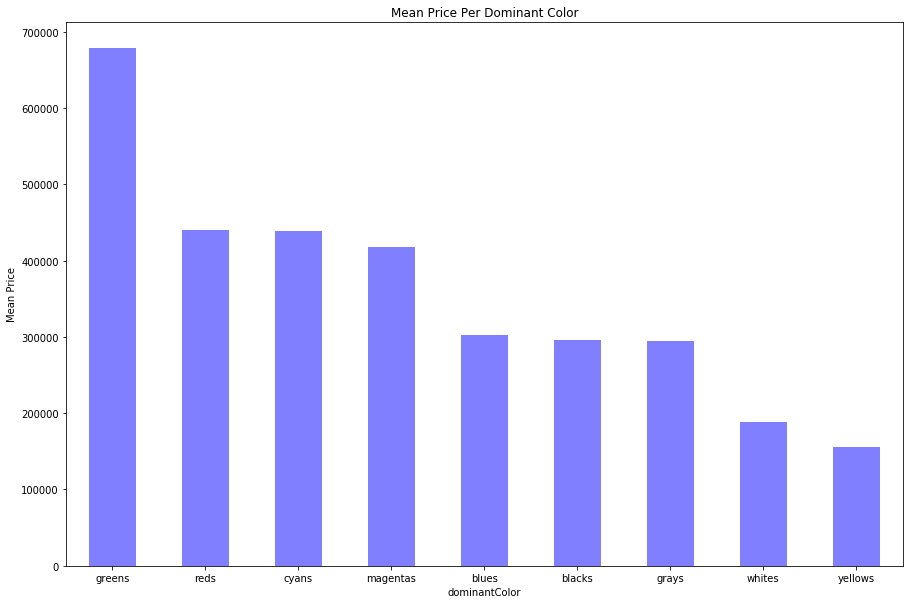

In [54]:
df_color = df.groupby(['dominantColor'])['price'].mean()
df_color = df_color.nlargest(n=9)

df_color.plot(kind='bar', figsize = (15,10), fontsize=10, rot='horizontal', title = "Mean Price Per Dominant Color", color='blue', alpha=0.5)
plt.ylabel("Mean Price")
plt.show()

Paintings with dominant color greens sold on average at $699,256 per piece.

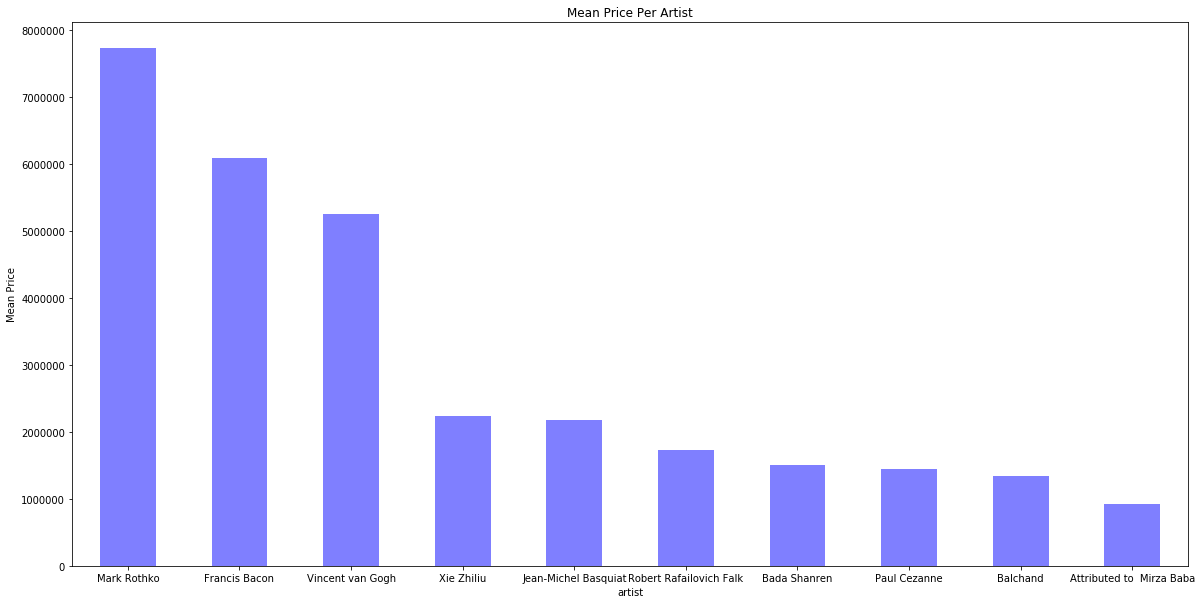

In [55]:
df_artist = df.groupby(['artist'])['price'].mean()
df_artist = df_artist.nlargest(n=10)

df_artist.plot(kind='bar', figsize = (20,10), fontsize=10, rot='horizontal', title = "Mean Price Per Artist", color='blue', alpha=0.5)
plt.ylabel("Mean Price")
plt.show()